## Exploratory Project - Smit Lunagariya

#### Implementation of Weighted Twin Support Vector Regression

In [1]:
# Importing required libraries

import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Importing Weighted Twin Support Vector Regression from wtsvr
from wtwinsvr import WeightedTSVR

In [3]:
# Creating the artificial data set
x = np.linspace(-10.2,10, num=81).reshape(-1,1)
y = np.sin(x)/x
yhat = y + np.random.normal(scale=0.1, size=81).reshape(-1,1) #Adding noise to original labels

In [4]:
wtsvr = WeightedTSVR(c1=0.10, c2=0.10, e1=10, e2=10, sigma=81, regul=0.0000001, sai1=0.1, sai2=0.1)

In [5]:
# Fit the data features that are to be learned by the model
wtsvr.fit(x, yhat)

     pcost       dcost       gap    pres   dres
 0: -8.1003e+03  9.1783e+02  3e+03  2e+02  1e-01
 1: -7.9386e+01 -8.1711e-01  4e+01  2e+00  1e-03
 2: -7.9449e-01 -8.4182e-01  1e+00  2e-02  1e-05
 3: -4.7193e-02 -8.1226e-02  9e-02  1e-03  7e-07
 4: -2.5344e-02 -3.2954e-02  1e-02  1e-04  9e-08
 5: -2.7521e-02 -2.8961e-02  2e-03  2e-05  1e-08
 6: -2.8249e-02 -2.8334e-02  1e-04  2e-07  1e-10
 7: -2.8301e-02 -2.8302e-02  1e-06  2e-09  1e-12
 8: -2.8301e-02 -2.8301e-02  1e-08  2e-11  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.1003e+03  9.1782e+02  3e+03  2e+02  1e-01
 1: -7.9386e+01 -8.1710e-01  4e+01  2e+00  1e-03
 2: -7.9449e-01 -8.4181e-01  1e+00  2e-02  1e-05
 3: -4.7195e-02 -8.1227e-02  9e-02  1e-03  7e-07
 4: -2.5335e-02 -3.2942e-02  1e-02  1e-04  9e-08
 5: -2.7518e-02 -2.8948e-02  2e-03  2e-05  1e-08
 6: -2.8243e-02 -2.8326e-02  9e-05  2e-07  1e-10
 7: -2.8294e-02 -2.8295e-02  9e-07  2e-09  1e-12
 8: -2.8294e-02 -2.8294e-02  9e-09  2e-11  1e-1

In [6]:
pred = wtsvr.predict(x)

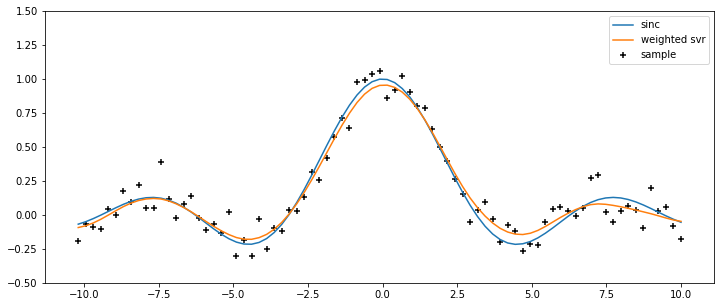

In [7]:
# Visualizing the original synthetic dataset with the output produced
plt.figure(figsize=(12,5))
plt.plot(x, y,label='sinc')
plt.scatter(x, yhat, marker='+', label='sample', color='black')
plt.plot(x, pred,label='weighted svr')
plt.ylim([-0.5,1.5])
plt.legend()

In [8]:
# Evaluation of the results based on various metrics
def Evaluation_of_result(y, ypred):
    def mean_abs_error(y, ypred):
        return mean_absolute_error(y, ypred)

    def root_mean_sq_error(y, ypred):
        return math.sqrt(mean_squared_error(y, ypred))

    def SSE(y, ypred):
        y.reshape(-1,1)
        ypred.reshape(-1,1)
        return mean_squared_error(y, ypred)*(y.shape[0])

    def SST(y):
        y.reshape(-1,1)
        return np.var(y)*(y.shape[0])

    def SSR(ypred):
        ypred.reshape(-1,1)
        return np.var(ypred)*(ypred.shape[0])

    print("MAE: ", mean_abs_error(y, ypred))
    print("RMSE: ", root_mean_sq_error(y, ypred))
    print("SSE: ", SSE(y, ypred))
    print("SSR: ", SSR(ypred))
    print("SST: ", SST(y))
    print("SSR/SST: ", SSR(ypred)/SST(y))
    print("SSE/SST: ", SSE(y,ypred)/SST(y))

In [9]:
print("The evaluation of results of Twin SVR are as follows:")
Evaluation_of_result(y, pred)

The evaluation of results of Twin SVR are as follows:
MAE:  0.03316856803939312
RMSE:  0.03985357630357049
SSE:  0.12865291107894572
SSR:  8.760771192392083
SST:  9.942618950174554
SSR/SST:  0.881133153779194
SSE/SST:  0.012939539544225123
